In [1]:
%matplotlib inline

## Functions:

In [2]:
import pandas as pd

def readTimeSeriesFromCSV(pathFileCSV, indexColumn):
    
    df = pd.read_csv(pathFileCSV, index_col = indexColumn)
    df.index.name = None
    df.reset_index(inplace = True)
    return df

In [3]:
def plotRollingMeanSTD(timeSeries, windowRange):
    
    # Determing rolling statistics
    rollingMean = timeSeries.rolling(window = windowRange, center = False).mean()
    rollingSTD = timeSeries.rolling(window = windowRange, center = False).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize = (15, 8))
    orig = plt.plot(timeSeries, color = 'blue', label = 'Original')
    mean = plt.plot(rollingMean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rollingSTD, color = 'black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & STD')
    plt.show()
    return

In [4]:
from statsmodels.tsa.stattools import adfuller

def DickeyFullerTest(timeSeries):
    
    # Perform Dickey-Fuller Test:
    DFAIC = adfuller(timeSeries, autolag = 'AIC')
    DFAIC_OUT = pd.Series(DFAIC[0:4], index = ['Test Statistic:','p-value:','Lag No.:','Observation No.:'])
    for key, value in DFAIC[4].items():
        DFAIC_OUT['Critical Value (%s)'%key] = value

    print 'Results of Dickey-Fuller Test:'
    print DFAIC_OUT
    return

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposSeasonality(timeSeries, modelType = "additive"):

    # model : str{"additive", "multiplicative"}
    # The additive model:       Y[t] = T[t] + S[t] + e[t]
    # The multiplicative model: Y[t] = T[t] * S[t] * e[t]
    
    decomposition = seasonal_decompose(timeSeries, model = modelType) 
    fig = plt.figure()
    fig = decomposition.plot()  
    fig.set_size_inches(15, 8)
    fig.show()
    return decomposition

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

def plotACFandPACF(timeSeries):
    fig = plt.figure(figsize=(15, 8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeSeries, ax = ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeSeries, ax = ax2)
    plt.show()
    return

In [7]:
from statsmodels.tsa.arima_model import ARIMA

pdq=[]
aic=[]

def ARIMAcalculator(ts, p, d, q):
    for pi in range(1, p+1):
        for di in range(d):
            for qi in range(1, q+1):
                model = ARIMA(ts, (pi, di, qi)).fit(disp = -1)
                aic_i = model.aic
                pdq_i = pi, di, qi
                print (pdq_i, aic_i)

                aic.append(aic_i)
                pdq.append(pdq_i)

    keys = pdq
    values = aic
    d = dict(zip(keys, values))
    print (d)

    minaic = min(d, key = d.get)

    for i in range(3):
        p = minaic[0]
        d = minaic[1]
        q = minaic[2]
        
    print (p, d, q)
    return

## Loading the Time Series Data:

In [19]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv("jobs.csv", index_col = 'Month', date_parser = dateparse)
ts = df.Jobs

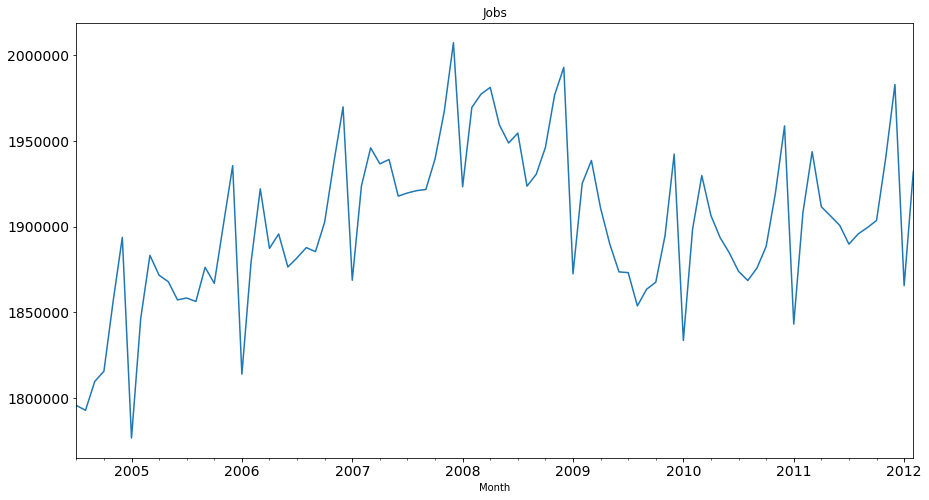

In [20]:
ts.plot(figsize = (15, 8), title = 'Jobs', fontsize = 14)

## Seasonality Check:

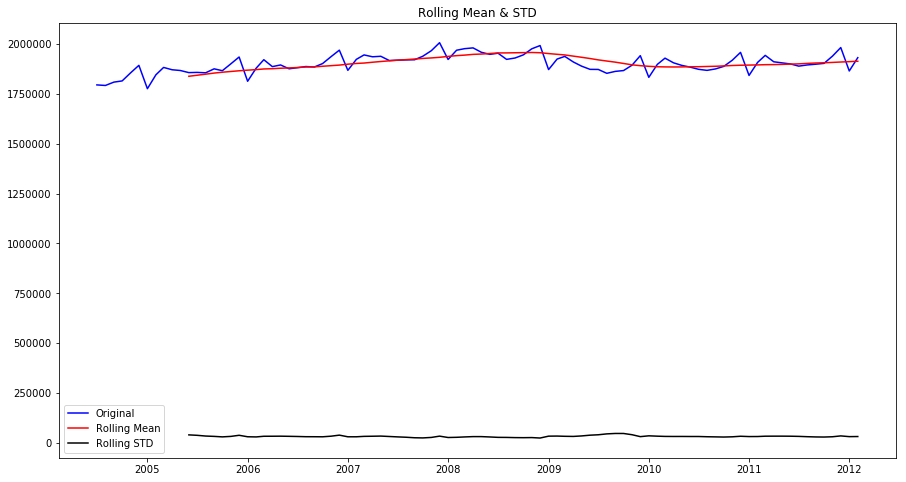

In [21]:
plotRollingMeanSTD(ts, 12)

In [22]:
DickeyFullerTest(ts)

Results of Dickey-Fuller Test:
Test Statistic:         -2.245208
p-value:                 0.190248
Lag No.:                12.000000
Observation No.:        79.000000
Critical Value (5%)     -2.898886
Critical Value (1%)     -3.515977
Critical Value (10%)    -2.586694
dtype: float64


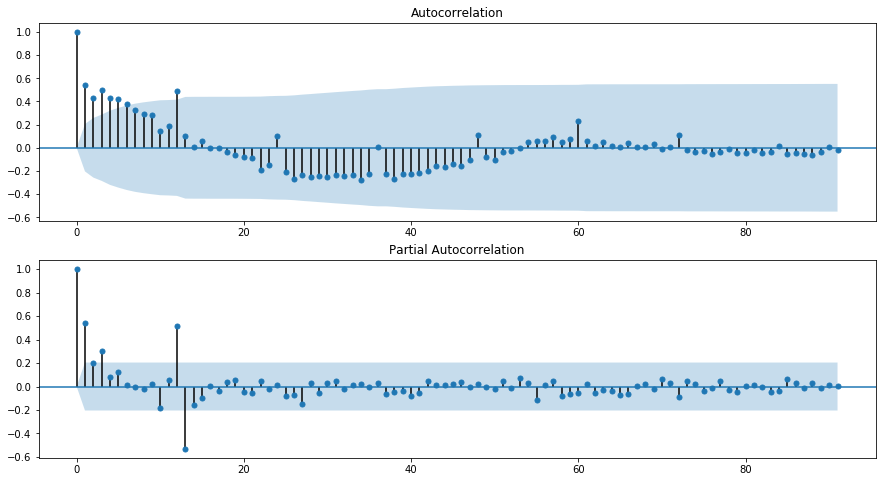

In [23]:
plotACFandPACF(ts)

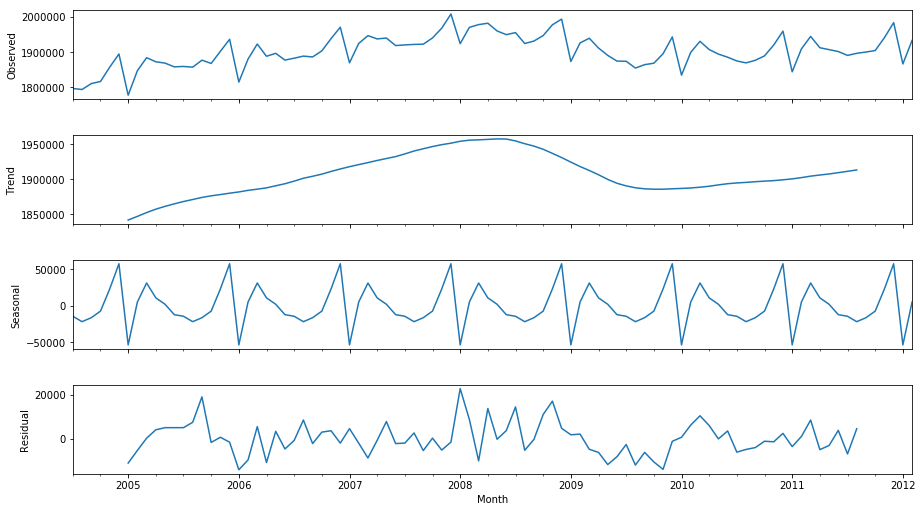

In [34]:
d1 = decomposSeasonality(ts)

In [37]:
d1_resid = d1.resid.dropna(inplace = False)
d1_trend = d1.trend.dropna(inplace = False)

In [38]:
#d2 = decomposSeasonality(ts, "multiplicative")

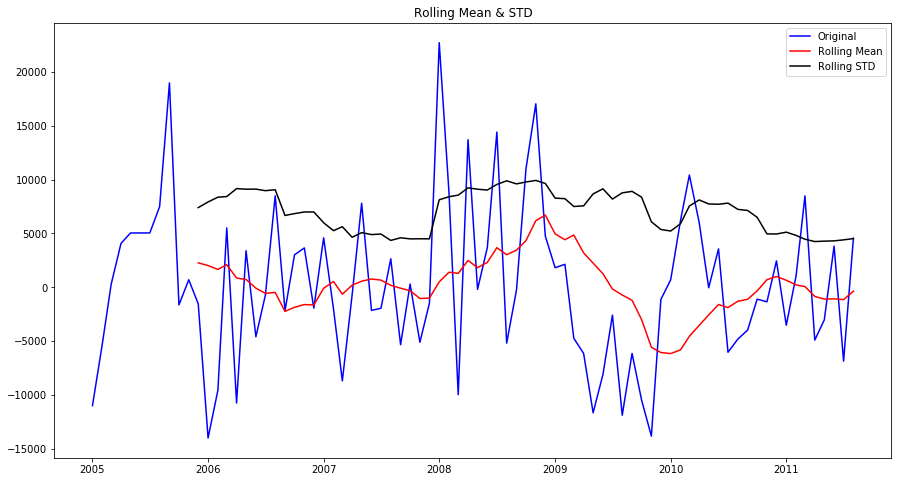

In [39]:
plotRollingMeanSTD(d1_resid, 12)

In [40]:
#plotRollingMeanSTD(d2.resid, 12)

In [41]:
DickeyFullerTest(d1_resid)
#print
#DickeyFullerTest(d2.resid.dropna(inplace = False))

Results of Dickey-Fuller Test:
Test Statistic:         -4.111136
p-value:                 0.000928
Lag No.:                 3.000000
Observation No.:        76.000000
Critical Value (5%)     -2.900395
Critical Value (1%)     -3.519481
Critical Value (10%)    -2.587498
dtype: float64


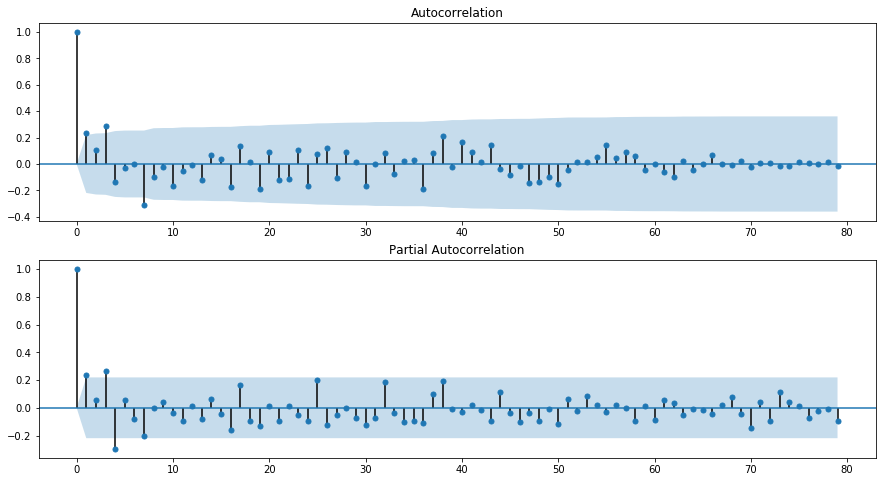

In [42]:
plotACFandPACF(d1_resid)

In [30]:
#plotACFandPACF(d2.resid.dropna(inplace = False))

In [31]:
#d3 = d1.resid.dropna(inplace = False).shift()
#d2.resid.shift = d2.resid - d2.resid.shift()
#plotACFandPACF(d3.dropna(inplace=False))

Differeing with shift function does not help that means ARIMA(p, 0, q) and ARIMA(p, 1, q) are the same

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model_d1 = ARIMA(d1_resid, order = (5, 1, 4))
result_d1 = model_d1.fit()
print result_d1.summary()

In [281]:
#from statsmodels.tsa.arima_model import ARIMA

#model_d2 = ARIMA(d2.resid.dropna(inplace = False), order = (5,1,5))
#result_d2 = model_d2.fit(disp = -1)
#print result_d2.summary()

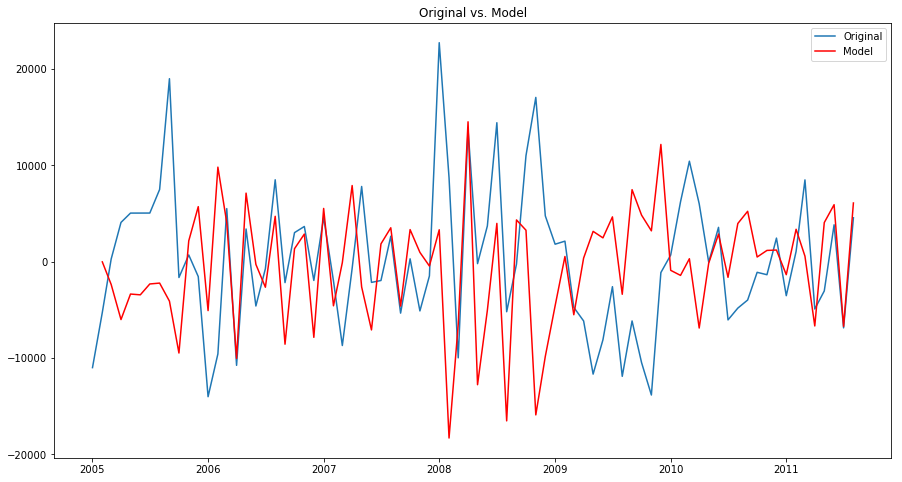

In [52]:
fig = plt.figure(figsize = (15, 8))
plt.plot(d1.resid.dropna(inplace = False), label = 'Original')
plt.plot(result_d1.fittedvalues, color = 'red', label = 'Model')
plt.legend(loc = 'best')
plt.title('Original vs. Model')
plt.show()

In [271]:
#fig = plt.figure(figsize = (15, 8))
#plt.plot(d2.resid.dropna(inplace = False), label = 'Original')
#plt.plot(result_d2.fittedvalues, color='red', label = 'Model')
#plt.legend(loc = 'best')
#plt.title('Original vs. Model')
#plt.show()

## Procedure to find Prediction Trend:

In [53]:
print d1_trend.index[0]
print d1_trend.index[len(d1_trend)-1]

2005-01-01 00:00:00
2011-08-01 00:00:00


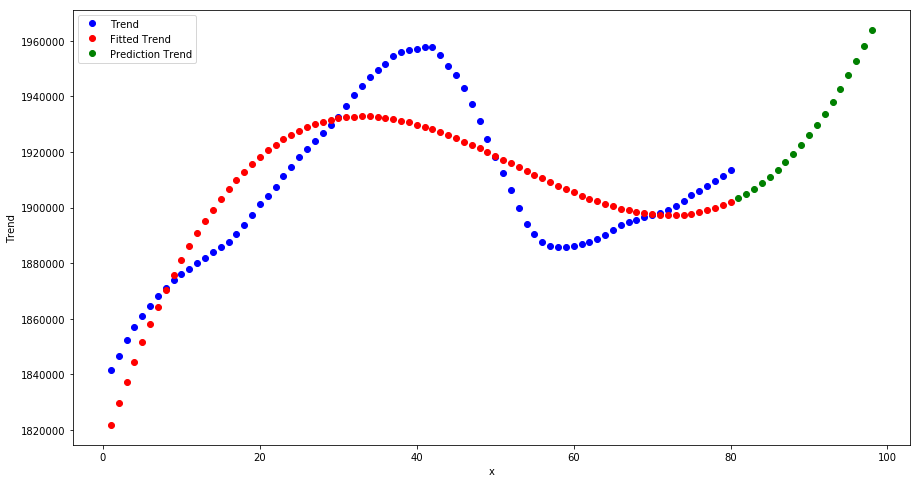

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#def func(x, a, b, c, d, e, f):
#    ff = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x**1 + f
#    return ff

def func(x, a, b, c, d):
    ff = a*x**3 + b*x**2 + c*x**1 + d
    return ff

y = d1_trend.values
x = np.linspace(1, len(y), len(y))

n_p = 18
len_ys = len(y) + n_p

xs = np.linspace(1, len_ys, len_ys)

popt, pcov = curve_fit(func, x, y)

xp = np.linspace(len(y) + 1, len_ys, n_p)

fig = plt.figure(figsize = (15, 8))
plt.plot(x, y, 'bo', label = 'Trend')
plt.plot(x, func(x, *popt), 'ro', label = 'Fitted Trend')
yp = func(xp, *popt)
plt.plot(xp, yp, 'go', label = 'Prediction Trend')

plt.xlabel('x')
plt.ylabel('Trend')
plt.legend(loc = 'best')
plt.show()

In [57]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2005-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months = x) for x in range(0, 98)]
d1_trend_predict = pd.Series(np.array(y.tolist() + yp.tolist()), index = pd.DatetimeIndex(date_list))
d1_trend_predict.name = "Jobs"
#print d1_trend_predict

## Calculating the Residual Prediction:

In [60]:
d1_resid_predict = result_d1.predict(start = '2005-02-01', end = '2013-02-01')
d1_resid_predict.name = "Jobs"
#print len(d1_resid_predict)

In [59]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2012-03-01", "%Y-%m-%d")
date_tmp = [start + relativedelta(months = x) for x in range(0, 12)]
values_tmp = list(d1.seasonal.values[80:92])

d1_seasonal_tmp = pd.Series(np.array(values_tmp), index = pd.DatetimeIndex(date_tmp))
d1_seasonal_tmp.name = "Jobs"
d1_seasonal = d1.seasonal
d1_seasonal_predict = d1_seasonal.append(d1_seasonal_tmp)
#d1_seasonal_predict

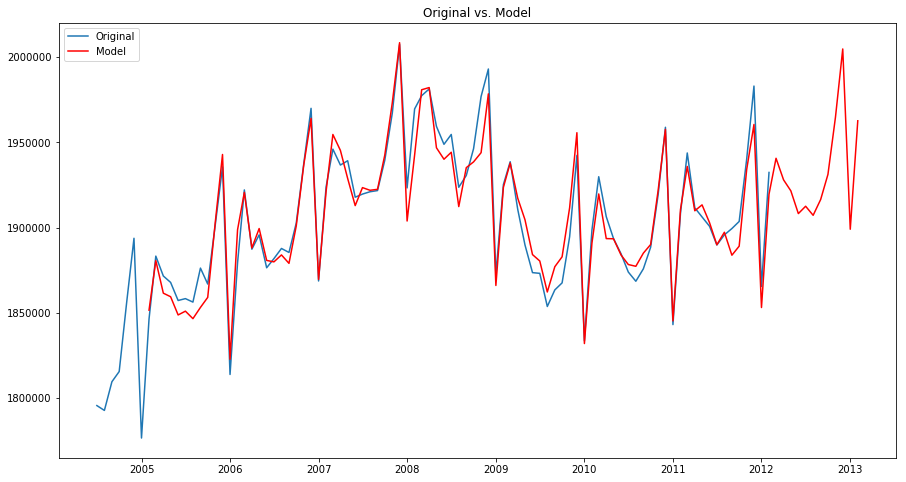

In [288]:
fig = plt.figure(figsize = (15, 8))
plt.plot(ts, label = 'Original')
d1_predict = d1_trend_predict + d1_seasonal_predict + d1_resid_predict
plt.plot(d1_predict, color = 'red', label = 'Model')
plt.legend(loc = 'best')
plt.title('Original vs. Model')
plt.show()